In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import matplotlib.pyplot as plt
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.10.1 --yes
import folium # plotting library
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20191204'
LIMIT = 40
location1=input("Enter desired location : ")

address = location1

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

Enter desired location : sector 35,Chandigarh


# Entertainment venues.

In [9]:
Categories=("Movie Theater","Music Venue","Performing Arts Venue","Stadium","Food")#"College & University","Food","Hospital","Maternity Clinic")

dataframe=pd.DataFrame()
for i in Categories:
    search_query=i
    radius = 5000
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    venues = results['response']['venues']
   
    dataframe = dataframe.append(json_normalize(venues))

# keep only columns that include venue name, and anything that is associated with location
    filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
    dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
    def get_category_type(row):
        try:
            categories_list = row['categories']
        except:
            categories_list = row['venue.categories']
        
        if len(categories_list) == 0:
            return None
        else:
            return categories_list[0]['name']

# filter the category for each row
    dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
    dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
  
entertainment_map= folium.Map(location=[latitude, longitude], zoom_start=13)



# display map
df=pd.DataFrame(dataframe_filtered.name)
df.reset_index()
print(df)
#venues_map

label = folium.Popup(location1, parse_html=True)
folium.CircleMarker(
   [latitude, longitude],
    radius=10,
    color='red',
    popup=label, 
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6,
   
    ).add_to(entertainment_map)
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    
    label1 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        parse_html=False,
        popup=label1,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(entertainment_map)
entertainment_map.save("emap.html")
display(entertainment_map)

                                                 name
0                                      Tagore Theater
1                                              Coveda
0                     Music World, Sec-22, Chandigarh
1                            Music Academy Chandigarh
2                                         Music World
3                                          Musicworld
4                                Bridge Music Academy
5                                         music world
6   Virk Music | New Punjabi Songs | New Hindi Son...
0                           Chandigarh Hockey Stadium
1                  Punjab Cricket Association Stadium
2          Chandigarh Lawn Tennis Association Stadium
3                                    Football Stadium
4                          Chandigarh cricket stadium
5                                       Local Stadium
6                                   Sector 46 stadium
7                                    Football Stadium
8                        Int

In [5]:
l=int(df.count())
print("Number of entertainment location : " )
print(l)

Number of entertainment location : 
57


# Medical healthcare

In [6]:
Categories=("Hospital","Maternity Clinic","Hospital Ward","Medical Center")

dataframe=pd.DataFrame()
for i in Categories:
   
    search_query=i
    radius = 5000
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    venues = results['response']['venues']
    dataframe = dataframe.append(json_normalize(venues))

# keep only columns that include venue name, and anything that is associated with location
    filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
    dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
    def get_category_type(row):
        try:
            categories_list = row['categories']
        except:
            categories_list = row['venue.categories']
        
        if len(categories_list) == 0:
            return None
        else:
            return categories_list[0]['name']

# filter the category for each row
    dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
    dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
  
medical_map= folium.Map(location=[latitude, longitude], zoom_start=13)



# display map
df=pd.DataFrame(dataframe_filtered.name)
df.reset_index()
print(df)
#venues_map

label = folium.Popup(location1, parse_html=True)
folium.CircleMarker(
   [latitude, longitude],
    radius=10,
    color='red',
    popup=label, 
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6,
   
    ).add_to(medical_map)
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    
    label1 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        parse_html=False,
        popup=label1,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(medical_map)
medical_map.save("medical_map.html")


                                                 name
0                                     Pandhi Hospital
1                  Grover Eye Laser & E.N.T. Hospital
2                                       Omni Hospital
3                                       Bedi Hospital
4                                  Virdi Eye Hospital
5                                     Fortis Hospital
6                                      Mukat Hospital
7                                   Landmark Hospital
8                                  Chaitanya Hospital
9                       Government Hospital Sector 32
10                                    Oxford Hospital
11                              Sangam Neuro Hospital
12                                    Chawla Hospital
13                                   grecian hospital
14            Max Healthcare Superspeciality Hospital
15                                    Fortis Hospital
16                                  Chatanya Hospital
17                    Cosmo 

In [7]:
m=dataframe.name.count()
print(m)

138


<BarContainer object of 2 artists>

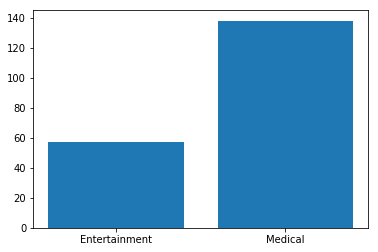

In [8]:
X=[l,m]
name=["Entertainment","Medical"]
plt.bar(name,X)

### According to intial lookup the chosen location is overall suited for every age group , due to its close proximity(about 5km/~3miles) to various entertainment and Medical healthcare centres.